In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
print("Complete import")

Complete import


Load data

In [2]:
cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']
insurance = pd.read_csv('./Data/insurance.csv', names=cols)
print(insurance.shape)
insurance.head()

(1339, 7)


,age,sex,bmi,children,smoker,region,expenses
0,age,sex,bmi,children,smoker,region,expenses
1,19,female,27.9,0,yes,southwest,16884.92
2,18,male,33.8,1,no,southeast,1725.55
3,28,male,33.0,3,no,southeast,4449.46
4,33,male,22.7,0,no,northwest,21984.47


In [3]:
insurance.describe()
insurance.dtypes
print(np.unique(insurance.values))

['0' '1' '10043.25' ... 'southeast' 'southwest' 'yes']


In [4]:
from sklearn import preprocessing
cleanup_nums = {"sex":     {"female": 0, "male": 1},
                "smoker": {"no": 0, "yes": 1},
                "region": {'northeast': 0, 'southeast': 1,'southwest' : 2, 'northwest': 3}}
insurance = insurance.replace(cleanup_nums)
insurance.head()

              

,age,sex,bmi,children,smoker,region,expenses
0,age,sex,bmi,children,smoker,region,expenses
1,19,0,27.9,0,1,2,16884.92
2,18,1,33.8,1,0,1,1725.55
3,28,1,33.0,3,0,1,4449.46
4,33,1,22.7,0,0,3,21984.47


In [5]:
insurance["sex"] = pd.to_numeric(insurance.sex, errors='coerce')
insurance["age"] = pd.to_numeric(insurance.age, errors='coerce')
insurance["bmi"] = pd.to_numeric(insurance.bmi, errors='coerce')
insurance["children"] = pd.to_numeric(insurance.children, errors='coerce')
insurance["smoker"] = pd.to_numeric(insurance.smoker, errors='coerce')
insurance["region"] = pd.to_numeric(insurance.region, errors='coerce')
insurance["expenses"] = pd.to_numeric(insurance.expenses, errors='coerce')

In [6]:
insurance = insurance.dropna()
insurance.shape

(1338, 7)

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

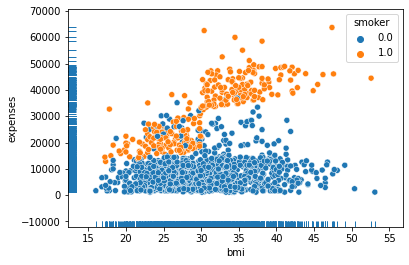

In [7]:
sns.scatterplot(x=insurance['bmi'], y=insurance['expenses'], hue=insurance['smoker'])
sns.rugplot(x=insurance['bmi'], y=insurance['expenses'])


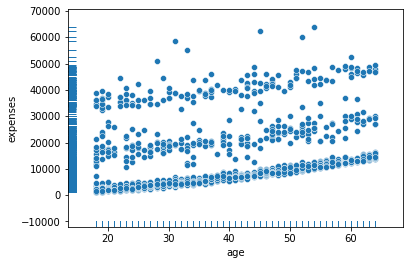

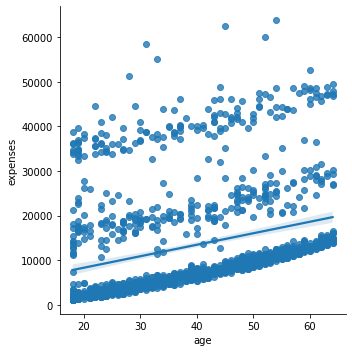

In [8]:
sns.scatterplot(x=insurance['age'], y=insurance['expenses'])
sns.rugplot(x=insurance['age'], y=insurance['expenses'])
sns.lmplot(x="age", y="expenses", data=insurance)

<AxesSubplot:xlabel='children', ylabel='expenses'>

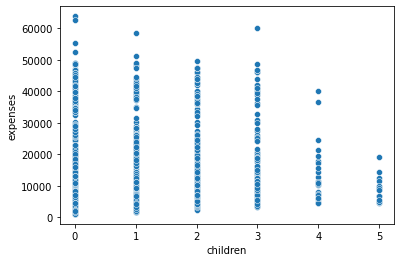

In [9]:
sns.scatterplot(x = insurance['children'], y = insurance['expenses'])


<AxesSubplot:xlabel='region', ylabel='expenses'>

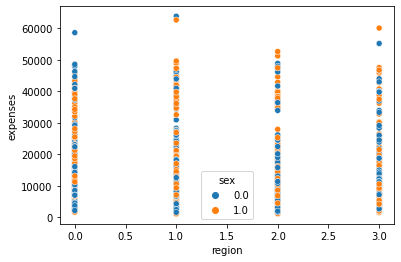

In [10]:
sns.scatterplot(x = insurance['region'], y = insurance['expenses'], hue = insurance['sex'])
# sns.scatterplot(x = insurance['region'], y = insurance['expenses'])


In [11]:
insurance.dtypes

age         float64
sex         float64
bmi         float64
children    float64
smoker      float64
region      float64
expenses    float64
dtype: object

**Normallize**

In [12]:
insurance

,age,sex,bmi,children,smoker,region,expenses
1,19.0,0.0,27.9,0.0,1.0,2.0,16884.92
2,18.0,1.0,33.8,1.0,0.0,1.0,1725.55
3,28.0,1.0,33.0,3.0,0.0,1.0,4449.46
4,33.0,1.0,22.7,0.0,0.0,3.0,21984.47
5,32.0,1.0,28.9,0.0,0.0,3.0,3866.86
...,...,...,...,...,...,...,...
1334,50.0,1.0,31.0,3.0,0.0,3.0,10600.55
1335,18.0,0.0,31.9,0.0,0.0,0.0,2205.98
1336,18.0,0.0,36.9,0.0,0.0,1.0,1629.83
1337,21.0,0.0,25.8,0.0,0.0,2.0,2007.95


In [13]:
data_normalize=(insurance-insurance.min())/(insurance.max()-insurance.min())
data_normalize.expenses = data_normalize.expenses*(insurance.expenses.max()-insurance.expenses.min())+insurance.expenses.min()
data_normalize

,age,sex,bmi,children,smoker,region,expenses
1,0.021739,0.0,0.320755,0.0,1.0,0.666667,16884.92
2,0.000000,1.0,0.479784,0.2,0.0,0.333333,1725.55
3,0.217391,1.0,0.458221,0.6,0.0,0.333333,4449.46
4,0.326087,1.0,0.180593,0.0,0.0,1.000000,21984.47
5,0.304348,1.0,0.347709,0.0,0.0,1.000000,3866.86
...,...,...,...,...,...,...,...
1334,0.695652,1.0,0.404313,0.6,0.0,1.000000,10600.55
1335,0.000000,0.0,0.428571,0.0,0.0,0.000000,2205.98
1336,0.000000,0.0,0.563342,0.0,0.0,0.333333,1629.83
1337,0.065217,0.0,0.264151,0.0,0.0,0.666667,2007.95


In [14]:
feature_cols = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
feature_cols2 = ['age', 'bmi', 'children', 'smoker']
X = data_normalize[feature_cols]
y = data_normalize['expenses']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train)
print(y_train)
A = data_normalize[feature_cols2]
b = data_normalize['expenses']
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.33, random_state=42)

           age  sex       bmi  children  smoker    region
1047  0.543478  0.0  0.245283       0.0     0.0  0.000000
683   0.456522  1.0  0.520216       0.4     1.0  0.666667
1038  0.586957  0.0  0.390836       0.2     1.0  1.000000
491   0.021739  0.0  0.455526       0.0     0.0  0.666667
40    0.913043  1.0  0.644205       0.0     1.0  0.666667
...        ...  ...       ...       ...     ...       ...
1096  0.000000  0.0  0.415094       0.8     0.0  0.000000
1131  0.456522  0.0  0.212938       1.0     0.0  0.333333
1295  0.869565  1.0  0.247978       0.0     0.0  0.000000
861   0.413043  0.0  0.851752       0.4     1.0  0.666667
1127  0.804348  1.0  0.374663       0.0     0.0  0.666667

[896 rows x 6 columns]
1047     7325.05
683     40103.89
1038    39725.52
491      1748.77
40      48173.36
          ...   
1096     4561.19
1131     8582.30
1295    11931.13
861     46113.51
1127    10214.64
Name: expenses, Length: 896, dtype: float64


In [44]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

distance_6 = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='distance').fit(X_train, y_train)
    predicted_values = knn_model.predict(X_test)
    predict_df = pd.DataFrame({"Dependent_Test" : y_test, "Dependent_Predicted" : predicted_values})
    mse_knn_distance = mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test)
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    distance_6.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# plt.plot(x ,distance_6)
# plt.xlabel("k")
# plt.ylabel('MSE_distance')
# plt.show()


 k = 1 Mean Squared Error =  53065763.04598145
 k = 2 Mean Squared Error =  38429920.87057336
 k = 3 Mean Squared Error =  35770129.417896725
 k = 4 Mean Squared Error =  34116611.11749678
 k = 5 Mean Squared Error =  31823845.88272604
 k = 6 Mean Squared Error =  31670868.097830456
 k = 7 Mean Squared Error =  31533111.452649564
 k = 8 Mean Squared Error =  31383894.99210778
 k = 9 Mean Squared Error =  31368182.908007868
 k = 10 Mean Squared Error =  31377586.388637327
 k = 11 Mean Squared Error =  31282387.833133336
 k = 12 Mean Squared Error =  31402480.416546997
 k = 13 Mean Squared Error =  31301859.59992273
 k = 14 Mean Squared Error =  31347428.763758257
 k = 15 Mean Squared Error =  31420215.418548755
 k = 16 Mean Squared Error =  31253850.740581524
 k = 17 Mean Squared Error =  31356729.901576087
 k = 18 Mean Squared Error =  31766588.415531423
 k = 19 Mean Squared Error =  31829451.20101201
 k = 20 Mean Squared Error =  31928735.85852446


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
uniform_6 = []


from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='uniform').fit(X_train, y_train)
    predicted_values = knn_model.predict(X_test)
    predict_df = pd.DataFrame({"Dependent_Test" : y_test, "Dependent_Predicted" : predicted_values})
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    uniform_6.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# plt.plot(x,uniform_6)
# plt.xlabel("k")
# plt.ylabel('MSE_uniform')
# plt.show()


 k = 1 Mean Squared Error =  53065763.04598145
 k = 2 Mean Squared Error =  38042367.78250453
 k = 3 Mean Squared Error =  35908526.68004528
 k = 4 Mean Squared Error =  34227834.6576583
 k = 5 Mean Squared Error =  31498814.653729822
 k = 6 Mean Squared Error =  32205517.321283486
 k = 7 Mean Squared Error =  32389665.124796905
 k = 8 Mean Squared Error =  32093291.800788414
 k = 9 Mean Squared Error =  32430243.773172826
 k = 10 Mean Squared Error =  32309616.414366696
 k = 11 Mean Squared Error =  32210565.310166385
 k = 12 Mean Squared Error =  32446630.906307306
 k = 13 Mean Squared Error =  32212489.327658597
 k = 14 Mean Squared Error =  32303028.774224553
 k = 15 Mean Squared Error =  32618688.03220302
 k = 16 Mean Squared Error =  32293774.193567988
 k = 17 Mean Squared Error =  32534336.981490456
 k = 18 Mean Squared Error =  33129731.37463589
 k = 19 Mean Squared Error =  33223732.84940244
 k = 20 Mean Squared Error =  33438046.914222553


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

distance_4 = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='distance').fit(A_train, b_train)
    predicted_values = knn_model.predict(A_test)
    predict_df = pd.DataFrame({"Dependent_Test" : b_test, "Dependent_Predicted" : predicted_values})
    mse_knn_distance = mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test)
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    distance_4.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# plt.plot(x ,distance_4)
# plt.xlabel("k")
# plt.ylabel('MSE_distance')
# plt.show()


 k = 1 Mean Squared Error =  42966147.374798425
 k = 2 Mean Squared Error =  31456952.805083945
 k = 3 Mean Squared Error =  28335028.269093253
 k = 4 Mean Squared Error =  26588135.771195214
 k = 5 Mean Squared Error =  26001850.826447878
 k = 6 Mean Squared Error =  25848051.5344593
 k = 7 Mean Squared Error =  25137882.56307059
 k = 8 Mean Squared Error =  24899453.191375274
 k = 9 Mean Squared Error =  24582662.90734936
 k = 10 Mean Squared Error =  24618946.95811105
 k = 11 Mean Squared Error =  24458890.013869867
 k = 12 Mean Squared Error =  24430031.382659487
 k = 13 Mean Squared Error =  24179882.426813014
 k = 14 Mean Squared Error =  23955754.108113762
 k = 15 Mean Squared Error =  23898941.25042891
 k = 16 Mean Squared Error =  23904834.96187178
 k = 17 Mean Squared Error =  24032634.13542718
 k = 18 Mean Squared Error =  23983899.1340055
 k = 19 Mean Squared Error =  24080275.47202944
 k = 20 Mean Squared Error =  24002919.38014114


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
uniform_4 = []


from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='uniform').fit(A_train, b_train)
    predicted_values = knn_model.predict(A_test)
    predict_df = pd.DataFrame({"Dependent_Test" : b_test, "Dependent_Predicted" : predicted_values})
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    uniform_4.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# plt.plot(x,uniform_4)
# plt.xlabel("k")
# plt.ylabel('MSE_uniform')
# plt.show()


 k = 1 Mean Squared Error =  42966147.374798425
 k = 2 Mean Squared Error =  29802462.66425283
 k = 3 Mean Squared Error =  25803304.49767346
 k = 4 Mean Squared Error =  23885211.498218443
 k = 5 Mean Squared Error =  23732160.891487308
 k = 6 Mean Squared Error =  23757894.83487377
 k = 7 Mean Squared Error =  22941220.31757769
 k = 8 Mean Squared Error =  22872956.255037315
 k = 9 Mean Squared Error =  22563636.83950542
 k = 10 Mean Squared Error =  22927044.7107482
 k = 11 Mean Squared Error =  22925340.233753882
 k = 12 Mean Squared Error =  23000482.69025216
 k = 13 Mean Squared Error =  22743449.677037954
 k = 14 Mean Squared Error =  22433908.27040664
 k = 15 Mean Squared Error =  22300507.74324033
 k = 16 Mean Squared Error =  22488718.75538853
 k = 17 Mean Squared Error =  22781727.77394549
 k = 18 Mean Squared Error =  22858971.148191314
 k = 19 Mean Squared Error =  23086472.617892347
 k = 20 Mean Squared Error =  22876874.50383933


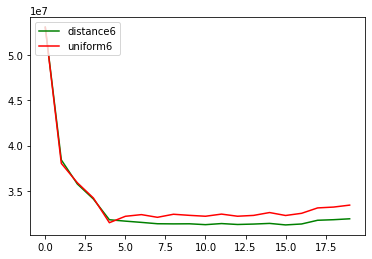

In [19]:
fig, ax = plt.subplots()

ax.plot(distance_6, color = 'green', label = 'distance6')
ax.plot(uniform_6 , color = 'red', label = 'uniform6')

ax.legend(loc = 'upper left')
plt.show()

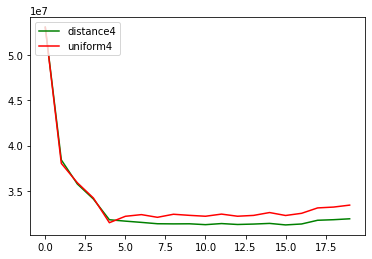

In [20]:
fig, ax = plt.subplots()

ax.plot(distance_6, color = 'green', label = 'distance4')
ax.plot(uniform_6 , color = 'red', label = 'uniform4')

ax.legend(loc = 'upper left')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
check = reg.predict(X_test)
mse_linear_6 = np.mean(np.square(y_test - check))
mse_linear_6

35346221.74168072

In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(A_train, b_train)
check = reg.predict(A_test)
mse_linear_4 = np.mean(np.square(b_test - check))
mse_linear_4

35297252.52263133

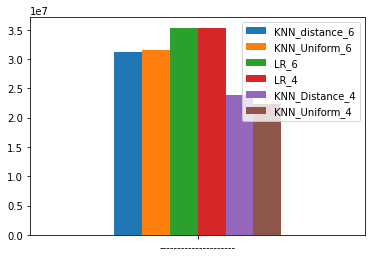

In [23]:

KNN_Distance_6 = [min(distance_6)]
KNN_Uniform_6 = [min(uniform_6)]
LR_6 = [mse_linear_6]
LR_4 = [mse_linear_4]
KNN_Distance_4 = [min(distance_4)]
old = [min(uniform_4)]
index = ['---------------------']
df = pd.DataFrame({'KNN_distance_6': KNN_Distance_6,
                   'KNN_Uniform_6': KNN_Uniform_6,
                   'LR_6': LR_6,
                   'LR_4': LR_4,
                   'KNN_Distance_4': KNN_Distance_4,
                   'KNN_Uniform_4': old
                   }, index=index)
ax = df.plot.bar(rot=0)

In [16]:


#define response variable
y = y
b = b

#define explanatory variable
x = X
a = A

#add constant to predictor variables
x = sm.add_constant(x)
a = sm.add_constant(a)
#fit linear regression model
model = sm.OLS(y, x).fit() 
modelx = sm.OLS(b,a).fit()

In [17]:
#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()
influencex = modelx.get_influence()
#obtain Cook's distance for each observation
cooks = influence.cooks_distance
cooksx = influencex.cooks_distance

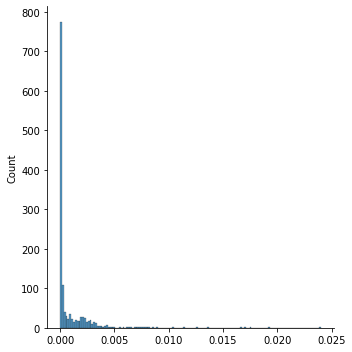

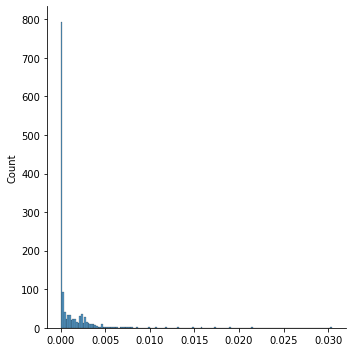

In [18]:
import seaborn as sns
sns.displot(cooks[0])
sns.displot(cooksx[0])

In [19]:
#display Cook's distances
j = 0
noise = []
noisex = []
k = []
for i in range(len(cooks[1])):
  if (cooks[0][i] > 0.004):
    j = j + 1
    noise.append(i)
    print(i)
  if (cooksx[0][i]>0.004):
    noisex.append(i)
    print(i)
print("________________")
print((j))
print(len(noisex))

3
3
9
9
34
34
62
62
69
98
98
99
99
102
102
115
115
140
140
219
219
242
242
250
250
266
289
289
321
321
380
380
387
387
412
412
430
430
468
468
488
488
494
516
516
520
526
526
543
543
573
573
577
577
587
599
599
696
739
793
806
806
819
819
860
936
959
980
987
994
994
1008
1008
1011
1012
1012
1019
1019
1027
1027
1039
1039
1047
1047
1085
1085
1100
1100
1142
1142
1146
1146
1156
1195
1195
1206
1206
1230
1230
1258
1258
1300
1300
1307
1317
1317
1328
1328
________________
53
55


In [20]:
newX = np.array(X)
newy = np.array(y)
newA = np.array(A)
newb = np.array(b)
for i in range(len(noise)):
  newX = np.delete(newX, noise[len(noise)-i-1], 0)
  newy = np.delete(newy, noise[len(noise)-i-1], 0)
for i in range(len(noisex)):
  newA = np.delete(newA, noisex[len(noisex)-i-1], 0)
  newb = np.delete(newb, noisex[len(noisex)-i-1], 0)


In [21]:
from sklearn.model_selection import train_test_split
newX_train, newX_test, newy_train, newy_test = train_test_split(newX, newy, test_size=0.33, random_state=42)
newA_train, newA_test, newb_train, newb_test = train_test_split(newA, newb, test_size=0.33, random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

distance_6 = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='distance').fit(newX_train, newy_train)
    predicted_values = knn_model.predict(newX_test)
    predict_df = pd.DataFrame({"Dependent_Test" : newy_test, "Dependent_Predicted" : predicted_values})
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    distance_6.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# plt.plot(x ,distance)
# plt.xlabel("k")
# plt.ylabel('MSE_distance')
# plt.show()


 k = 1 Mean Squared Error =  27509197.59391859
 k = 2 Mean Squared Error =  19607507.40527329
 k = 3 Mean Squared Error =  18184396.119649448
 k = 4 Mean Squared Error =  17113755.80224283
 k = 5 Mean Squared Error =  16560297.35620579
 k = 6 Mean Squared Error =  16617341.338621765
 k = 7 Mean Squared Error =  16822263.646140825
 k = 8 Mean Squared Error =  17164649.988064136
 k = 9 Mean Squared Error =  17369598.988144666
 k = 10 Mean Squared Error =  17891998.443641096
 k = 11 Mean Squared Error =  18134127.70192576
 k = 12 Mean Squared Error =  18394154.42243535
 k = 13 Mean Squared Error =  18460199.17629104
 k = 14 Mean Squared Error =  18588864.273928933
 k = 15 Mean Squared Error =  19056067.008071378
 k = 16 Mean Squared Error =  19189809.2581382
 k = 17 Mean Squared Error =  19536843.863540076
 k = 18 Mean Squared Error =  19864809.565296527
 k = 19 Mean Squared Error =  19990946.20889582
 k = 20 Mean Squared Error =  20111029.457769558


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

uniform_6 = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='uniform').fit(newX_train, newy_train)
    predicted_values = knn_model.predict(newX_test)
    predict_df = pd.DataFrame({"Dependent_Test" : newy_test, "Dependent_Predicted" : predicted_values})
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    uniform_6.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# plt.plot(x ,uniform)
# plt.xlabel("k")
# plt.ylabel('MSE_distance')
# plt.show()


 k = 1 Mean Squared Error =  27509197.59391859
 k = 2 Mean Squared Error =  20898900.441657532
 k = 3 Mean Squared Error =  19882252.723972626
 k = 4 Mean Squared Error =  18864625.511320747
 k = 5 Mean Squared Error =  18866170.713416085
 k = 6 Mean Squared Error =  19300702.875117067
 k = 7 Mean Squared Error =  19799125.41143692
 k = 8 Mean Squared Error =  20608438.655825343
 k = 9 Mean Squared Error =  20835210.048196852
 k = 10 Mean Squared Error =  21549750.33963354
 k = 11 Mean Squared Error =  21627444.9045925
 k = 12 Mean Squared Error =  21937542.94280655
 k = 13 Mean Squared Error =  21817878.451575663
 k = 14 Mean Squared Error =  21931223.33278027
 k = 15 Mean Squared Error =  22652959.89948988
 k = 16 Mean Squared Error =  22709752.28646173
 k = 17 Mean Squared Error =  23091986.243933335
 k = 18 Mean Squared Error =  23483986.385651648
 k = 19 Mean Squared Error =  23512625.561753575
 k = 20 Mean Squared Error =  23624242.634456914


In [22]:
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split

reg = LinearRegression().fit(newX_train, newy_train)
check = reg.predict(newX_test)
mse = np.mean(np.square(newy_test - check))
mse

23219097.832243573

In [33]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(newA_train, newb_train)
check = reg.predict(newA_test)
mse_linear_4 = np.mean(np.square(newb_test - check))
mse_linear_4

26101174.396164242

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

distance_4 = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='distance').fit(newA_train, newb_train)
    predicted_values = knn_model.predict(newA_test)
    
    predict_df = pd.DataFrame({"Dependent_Test" : newb_test, "Dependent_Predicted" : predicted_values})
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    distance_4.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# plt.plot(x ,distance)
# plt.xlabel("k")
# plt.ylabel('MSE_distance')
# plt.show()


 k = 1 Mean Squared Error =  33220502.67674717
 k = 2 Mean Squared Error =  24350562.636300437
 k = 3 Mean Squared Error =  20748178.29994435
 k = 4 Mean Squared Error =  19776253.86482909
 k = 5 Mean Squared Error =  18630588.25251358
 k = 6 Mean Squared Error =  17888259.753782667
 k = 7 Mean Squared Error =  17877539.135181967
 k = 8 Mean Squared Error =  17671483.87251357
 k = 9 Mean Squared Error =  17603643.74933004
 k = 10 Mean Squared Error =  17480148.870911427
 k = 11 Mean Squared Error =  17325214.902553428
 k = 12 Mean Squared Error =  17404715.004202716
 k = 13 Mean Squared Error =  17357482.5200188
 k = 14 Mean Squared Error =  17269836.749954205
 k = 15 Mean Squared Error =  17309738.095819715
 k = 16 Mean Squared Error =  17223890.681446448
 k = 17 Mean Squared Error =  17187063.662323218
 k = 18 Mean Squared Error =  17208687.710679036
 k = 19 Mean Squared Error =  17259785.22701015
 k = 20 Mean Squared Error =  17297836.292103034


In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

uniform_4 = []
from sklearn.neighbors import KNeighborsRegressor
for i in range(20):
    knn_model = KNeighborsRegressor(n_neighbors=i+1, weights='uniform').fit(newA_train, newb_train)
    predicted_values = knn_model.predict(newA_test)
    predict_df = pd.DataFrame({"Dependent_Test" : newb_test, "Dependent_Predicted" : predicted_values})
    print(" k = " + str(i+1) + " Mean Squared Error = ", mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
    uniform_4.append(mean_squared_error(predict_df.Dependent_Predicted, predict_df.Dependent_Test))
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# plt.plot(x ,uniform)
# plt.xlabel("k")
# plt.ylabel('MSE_distance')
# plt.show()


 k = 1 Mean Squared Error =  33220502.67674717
 k = 2 Mean Squared Error =  22846975.996418577
 k = 3 Mean Squared Error =  18907000.587375443
 k = 4 Mean Squared Error =  18033967.34961318
 k = 5 Mean Squared Error =  16738819.418846795
 k = 6 Mean Squared Error =  16217749.20733659
 k = 7 Mean Squared Error =  16508768.525549354
 k = 8 Mean Squared Error =  16392731.723498633
 k = 9 Mean Squared Error =  16574058.108889492
 k = 10 Mean Squared Error =  16494178.009169007
 k = 11 Mean Squared Error =  16373096.742983652
 k = 12 Mean Squared Error =  16726366.076897003
 k = 13 Mean Squared Error =  16858253.451292276
 k = 14 Mean Squared Error =  16832413.252335995
 k = 15 Mean Squared Error =  16997372.34930491
 k = 16 Mean Squared Error =  16938245.525235213
 k = 17 Mean Squared Error =  16979300.89803232
 k = 18 Mean Squared Error =  17176772.218677152
 k = 19 Mean Squared Error =  17321438.92600031
 k = 20 Mean Squared Error =  17454982.485660486


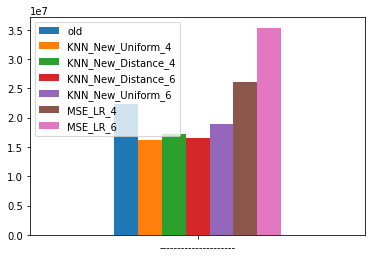

In [36]:
KNN_Uniform_4 = [min(uniform_4)]
KNN_Distance_4 = [min(distance_4)]
New_Distance_6 = [min(distance_6)]
New_Uniform_6 = [min(uniform_6)]
LR_4 = [mse_linear_4]
LR_6 = [mse_linear_6]
index = ['---------------------']
df = pd.DataFrame({'old' : old,
                    'KNN_New_Uniform_4': KNN_Uniform_4,
                    'KNN_New_Distance_4': KNN_Distance_4,
                   'KNN_New_Distance_6': New_Distance_6,
                   'KNN_New_Uniform_6': New_Uniform_6,
                    'MSE_LR_4': LR_4,
                   'MSE_LR_6': LR_6,
                   
                   
                   

                   }, index=index)
ax = df.plot.bar(rot=0)

In [37]:
KNN_Uniform_4

[16217749.20733659]